In [1]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
import seaborn as sns
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
N=5000
t_p=1000
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
q_g=0.99
p_max=175
alpha=np.zeros(p_max)
overlaps=np.zeros(p_max)

In [2]:
# Structral connectivity matrix
#Firing rate pattern
C=np.zeros((N,N),dtype='int8')
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1
# initial firing rate
r0=np.random.uniform(0,5,N)
print(r0)

[3.09284829 2.17671897 0.79870406 ... 3.34645152 1.3622614  2.80076214]


p=1
p=2
p=3
p=4
p=5
p=6
p=7
p=8
p=9
p=10
p=11
p=12
p=13
p=14
p=15
p=16
p=17
p=18
p=19
p=20
p=21
p=22
p=23
p=24
p=25
p=26
p=27
p=28
p=29
p=30
p=31
p=32
p=33
p=34
p=35
p=36
p=37
p=38
p=39
p=40
p=41
p=42
p=43
p=44
p=45
p=46
p=47
p=48
p=49
p=50
p=51
p=52
p=53
p=54
p=55
p=56
p=57
p=58
p=59
p=60
p=61
p=62
p=63
p=64
p=65
p=66
p=67
p=68
p=69
p=70
p=71
p=72
p=73
p=74
p=75
p=76
p=77
p=78
p=79
p=80
p=81
p=82
p=83
p=84
p=85
p=86
p=87
p=88
p=89
p=90
p=91
p=92
p=93
p=94
p=95
p=96
p=97
p=98
p=99
p=100
p=101
p=102
p=103
p=104
p=105
p=106
p=107
p=108
p=109
p=110
p=111
p=112
p=113
p=114
p=115
p=116
p=117
p=118
p=119
p=120
p=121
p=122
p=123
p=124
p=125
p=126
p=127
p=128
p=129
p=130
p=131
p=132
p=133
p=134
p=135
p=136
p=137
p=138
p=139
p=140
p=141
p=142
p=143
p=144
p=145
p=146
p=147
p=148
p=149
p=150
p=151
p=152
p=153
p=154
p=155
p=156
p=157
p=158
p=159
p=160
p=161
p=162
p=163
p=164
p=165
p=166
p=167
p=168
p=169
p=170
p=171
p=172
p=173
p=174
p=175


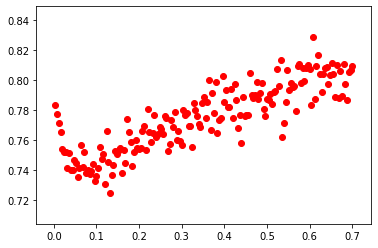

In [3]:
for p in range(1,p_max+1):
    print('p='+str(p))
    xi_pattern=np.random.normal(0,1,size=(p,N))
    r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
    #Final connectivity matrix J
    J=np.zeros((N,N))
    #equation 2
    Sum=np.zeros((N,N))
    for k in range(p):
        Sum=Sum+np.dot(f(r_pattern[k]).reshape(N,1),g(r_pattern[k]).reshape(1,N))
    J=A*C/c/N*Sum
    for i in range(N):
        J[i,i]=0
    I=I0*xi_pattern[0]
    r[:,0]=r0
    for t in range(1,t_pre):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    for t in range(t_pre,t_delay):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    for t in range(t_delay,t_max):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    #Overlap
    p_r=np.zeros(t_max-t_p)
    for t in range(0,t_max-t_p):
        p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
    alpha[p-1]=p/N/c
    overlaps[p-1]=np.max(p_r)
plt.figure()
plt.scatter(alpha,overlaps,marker='o',color='red')

In [4]:
print(overlaps)

[0.78332163 0.77733083 0.77115739 0.76524718 0.75396991 0.75216856
 0.75205055 0.7412028  0.7517646  0.73995199 0.74046738 0.74689944
 0.74452836 0.73560508 0.74143181 0.75656294 0.74209704 0.75239068
 0.73798835 0.74006266 0.73734341 0.73927849 0.74434721 0.73277153
 0.73646247 0.74171674 0.75551781 0.74745298 0.75079844 0.7307295
 0.76594446 0.74531231 0.72470166 0.73663025 0.74368354 0.75261054
 0.75106345 0.75378506 0.75455927 0.73835785 0.75355332 0.7445874
 0.77439155 0.76558292 0.75895577 0.74289911 0.75228435 0.7601105
 0.75491996 0.75436467 0.75456856 0.76622937 0.76920156 0.75348109
 0.78056844 0.76523356 0.75871492 0.76497384 0.77683108 0.76179712
 0.76383926 0.76851834 0.76757202 0.76428945 0.77639616 0.77476281
 0.75277359 0.75727479 0.77370033 0.7688557  0.77895047 0.76003988
 0.76592575 0.75966892 0.75656927 0.78012909 0.77662165 0.77833354
 0.7692582  0.76921926 0.75570535 0.78488774 0.77982837 0.77601317
 0.77101068 0.76885554 0.78449996 0.78905206 0.77500128 0.7851386

In [11]:
print(np.sort(p_r))

[0.06266258 0.06266258 0.06266258 ... 0.80926446 0.80927536 0.80929953]
